In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import os
%matplotlib inline

In [2]:
os.chdir(r"C:\Users\Archit\Desktop\Tree")

In [3]:
os.listdir()

['bank.xlsx',
 'banks.csv',
 'Feature_imp.csv',
 'random forest1.ipynb',
 'rf.ipynb',
 'rf_bank.csv',
 'Tree Tutorial text.ipynb',
 'Tree.ipynb',
 'Tree_Cancer.ipynb',
 'xgboost.ipynb',
 '~$bank.xlsx']

In [4]:
bank=pd.read_csv("banks.csv")

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,no,2343,yes,no,5,may,1042,1,0,unknown,yes,0.000100
1,56,white-collar,married,secondary,no,45,no,no,5,may,1467,1,0,unknown,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,0,unknown,yes,0.000100
3,55,pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,0,unknown,yes,0.000100
4,54,white-collar,married,tertiary,no,184,no,no,5,may,673,2,0,unknown,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,0,unknown,no,0.000100
11158,39,pink-collar,married,secondary,no,733,no,no,16,jun,83,4,0,unknown,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,0,unknown,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,5,failure,no,0.005814


In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0000,32.0000,39.0000,49.000000,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0000,122.0000,550.0000,1708.000000,81204.0
day,11162.0,15.658036,8.420740,1.0000,8.0000,15.0000,22.000000,31.0
duration,11162.0,371.993818,347.128386,2.0000,138.0000,255.0000,496.000000,3881.0
campaign,11162.0,2.508421,2.722077,1.0000,1.0000,2.0000,3.000000,63.0
previous,11162.0,0.832557,2.292007,0.0000,0.0000,0.0000,1.000000,58.0
recent_pdays,11162.0,0.003124,0.030686,0.0001,0.0001,0.0001,0.001919,1.0


In [8]:
bank.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

In [10]:
tt=bank.corr()

In [11]:
tt.to_csv("tt.csv")

In [13]:
ty=bank.describe(percentiles=[0.01, 0.05, 0.1,.25,.5,.75,.9,.95, .96,.97,.98,.99]).T

In [14]:
ty.to_csv("ty.csv")

In [16]:
bank.describe( include=["object"]).T

,count,unique,top,freq
job,11162,7,white-collar,3900
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
month,11162,12,may,2824
poutcome,11162,3,unknown,8863
deposit,11162,2,no,5873


In [19]:
bank1=bank.copy()

bank1=pd.get_dummies(bank1, columns=["job", "marital", "education", "default", "housing", "loan", "poutcome",
                             "deposit"], drop_first=True)

In [20]:
bank1

,age,balance,day,month,duration,campaign,previous,recent_pdays,job_entrepreneur,job_other,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,may,1042,1,0,0.000100,0,0,...,0,1,0,0,0,1,0,0,1,1
1,56,45,5,may,1467,1,0,0.000100,0,0,...,0,1,0,0,0,0,0,0,1,1
2,41,1270,5,may,1389,1,0,0.000100,0,0,...,0,1,0,0,0,1,0,0,1,1
3,55,2476,5,may,579,1,0,0.000100,0,0,...,0,1,0,0,0,1,0,0,1,1
4,54,184,5,may,673,2,0,0.000100,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,0,0.000100,0,0,...,1,0,0,0,0,1,0,0,1,0
11158,39,733,16,jun,83,4,0,0.000100,0,0,...,0,1,0,0,0,0,0,0,1,0
11159,32,29,19,aug,156,2,0,0.000100,0,0,...,1,1,0,0,0,0,0,0,1,0
11160,43,0,8,may,9,2,5,0.005814,0,0,...,0,1,0,0,0,0,1,0,0,0


In [21]:
bank1.drop(columns=["day","month"], inplace=True)

In [22]:
bank1

,age,balance,duration,campaign,previous,recent_pdays,job_entrepreneur,job_other,job_pink-collar,job_self-employed,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,1042,1,0,0.000100,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
1,56,45,1467,1,0,0.000100,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,41,1270,1389,1,0,0.000100,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,55,2476,579,1,0,0.000100,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1
4,54,184,673,2,0,0.000100,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
11158,39,733,83,4,0,0.000100,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
11160,43,0,9,2,5,0.005814,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [23]:
X=bank1.drop( columns=["deposit_yes"])
y=bank1["deposit_yes"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [25]:
from sklearn.tree import DecisionTreeClassifier


In [26]:
dt1=DecisionTreeClassifier()

In [27]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
dt1.score(X_train, y_train)

1.0

In [29]:
dt1.score(X_test, y_test)

0.7344379758172862

In [52]:
help(dt1)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [58]:
depth=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_score=[]
test_score=[]
for i in depth:
    dt3=DecisionTreeClassifier(max_depth=i)
    dt3.fit(X_train,y_train)
    train_score.append(dt3.score(X_train, y_train))
    test_score.append(dt3.score(X_test, y_test))
    

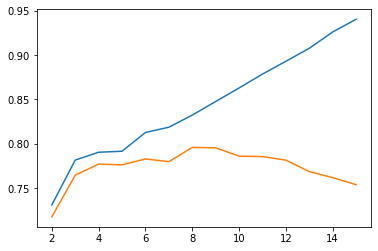

In [59]:
import matplotlib.pyplot as plt
plt.plot(depth, train_score)
plt.plot(depth, test_score)

In [34]:
dt1=DecisionTreeClassifier(max_depth=6)
dt1.fit(X_train,y_train)
print("Train score :",dt1.score(X_train, y_train))
print("Test score :",dt1.score(X_test, y_test))

Train score : 0.8129689774890805
Test score : 0.7832512315270936


In [36]:
dt1=DecisionTreeClassifier(min_samples_split=100)
dt1.fit(X_train,y_train)
print("Train score :",dt1.score(X_train, y_train))
print("Test score :",dt1.score(X_test, y_test))

Train score : 0.8369358270803001
Test score : 0.799373040752351


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              'class_weight':('balanced', None)
             }


tr = DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(X_train, y_train)
# model = gsearch.best_estimator_
# model

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    9.9s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [43]:
gsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 5}

In [44]:
dt1=DecisionTreeClassifier(min_samples_split=5, max_depth=8, criterion="gini", class_weight="balanced")
dt1.fit(X_train,y_train)
print("Train score :",dt1.score(X_train, y_train))
print("Test score :",dt1.score(X_test, y_test))

Train score : 0.8344719453466234
Test score : 0.793999104343932


In [45]:
dt1.feature_importances_

array([5.30473740e-02, 3.98287156e-02, 5.44620498e-01, 2.02629804e-02,
       1.60352613e-02, 6.33616449e-02, 2.60344098e-03, 7.05087856e-04,
       0.00000000e+00, 0.00000000e+00, 1.75630680e-04, 1.02058289e-03,
       3.25903831e-03, 2.86805094e-03, 5.76344729e-04, 5.80875531e-03,
       0.00000000e+00, 0.00000000e+00, 1.11994436e-01, 5.82510473e-03,
       1.23803799e-01, 4.20325410e-03])

In [46]:
fi = dt1.feature_importances_

feature_imp=pd.DataFrame({"Features":X_train.columns, "Impo":dt1.feature_importances_}).sort_values("Impo",ascending=False)

In [47]:
feature_imp

,Features,Impo
2,duration,0.544620
20,poutcome_success,0.123804
18,housing_yes,0.111994
5,recent_pdays,0.063362
0,age,0.053047
1,balance,0.039829
3,campaign,0.020263
4,previous,0.016035
19,loan_yes,0.005825
15,education_tertiary,0.005809


In [48]:
feature_imp.to_csv("feature_importance.csv")

In [49]:
selected_var=['duration','poutcome_success','housing_yes','recent_pdays','age','balance','campaign','previous','loan_yes','education_tertiary']

In [67]:
X=bank1[selected_var]
y=bank1["deposit_yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
dt2=DecisionTreeClassifier(min_samples_split=5, max_depth=8, criterion="gini", class_weight="balanced")
dt2.fit(X_train,y_train)
print("Train score :",dt2.score(X_train, y_train))
print("Test score :",dt2.score(X_test, y_test))

Train score : 0.8340239668495912
Test score : 0.7948947604120018


In [69]:
y_pred=dt2.predict(X_train)
X_train["p_1"]=dt2.predict_proba(X_train)[:,1]
X_train["y_actual"]=y_train
X_train["y_pred"]=y_pred
X_train["Rank"]=pd.qcut(X_train["p_1"], 10, labels=np.arange(0,10,1))
X_train["Numb"]=10
X_train["Decile"]=X_train["Numb"]-X_train["Rank"].astype("int")
profiletest=pd.DataFrame(X_train.groupby("Decile").apply(lambda x:pd.Series({
    "min_score"  :x["p_1"].min(),
    "max_score"  :x["p_1"].max(),
    "Event"      :x["y_actual"].sum(),
    "Non_event"  :x["y_actual"].count()-x["y_pred"].sum(),
    "Total"      :x["y_actual"].count()
})))

<ipython-input-69-0e7d5a02a424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["p_1"]=dt2.predict_proba(X_train)[:,1]
<ipython-input-69-0e7d5a02a424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["y_actual"]=y_train
<ipython-input-69-0e7d5a02a424>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [70]:
profiletest.to_csv("fgh.csv")

In [ ]:
Classification_report , AUC, ROC, Decile Analyis , KS Value , 